In [8]:
import pandas as pd

#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(r"C:\Users\pulkit.goel\Downloads\iris.data", names=['sepal length','sepal width','petal length','petal width','target'])
df.shape
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
# Standardise or Scale the Data
from sklearn.preprocessing import StandardScaler
features = ['sepal length','sepal width','petal length','petal width']

# Separating out the features and target
x = df.loc[:,features].values
y = df.loc[:,['target']].values

#Applying the Scaling 
x = StandardScaler().fit_transform(x)
newDf = pd.DataFrame(data = x,columns = ['sepal length','sepal width','petal length','petal width'] )
newDf.head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf.head()

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [33]:
finalDf = pd.concat([principalDf,df[['target']]],axis =1)
finalDf.head()

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


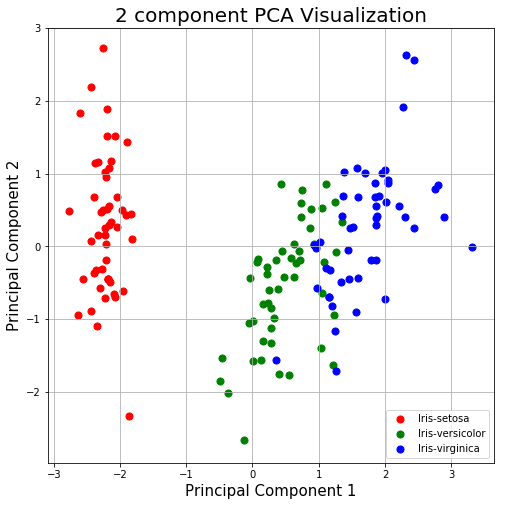

In [36]:
# Visulaize 2D Projection
from matplotlib import pyplot as plt


fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize =15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA Visualization' , fontsize = 20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r','g','b']
for target,color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep,'principal component 1'], 
               finalDf.loc[indicesToKeep, 'principal component 2'],
               c = color,
              s = 50)
ax.legend(targets)
ax.grid()

In [40]:
#pca.explained_variance_
pca.explained_variance_ratio_


array([0.72770452, 0.23030523])